In [1]:
#import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:/Users/84869/DATA ANALYST/DATA/DataCoSupplyChainDataset.csv", encoding= 'unicode_escape')

In [3]:
df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [4]:
missing_values = df.isnull().sum()
print(missing_values)

Type                                  0
Days for shipping (real)              0
Days for shipment (scheduled)         0
Benefit per order                     0
Sales per customer                    0
Delivery Status                       0
Late_delivery_risk                    0
Category Id                           0
Category Name                         0
Customer City                         0
Customer Country                      0
Customer Email                        0
Customer Fname                        0
Customer Id                           0
Customer Lname                        8
Customer Password                     0
Customer Segment                      0
Customer State                        0
Customer Street                       0
Customer Zipcode                      3
Department Id                         0
Department Name                       0
Latitude                              0
Longitude                             0
Market                                0


In [5]:
# Kiểm tra tần số xuất hiện của các loại sản phẩm trong Delivery Status
delivery_status_counts = df['Delivery Status'].value_counts()

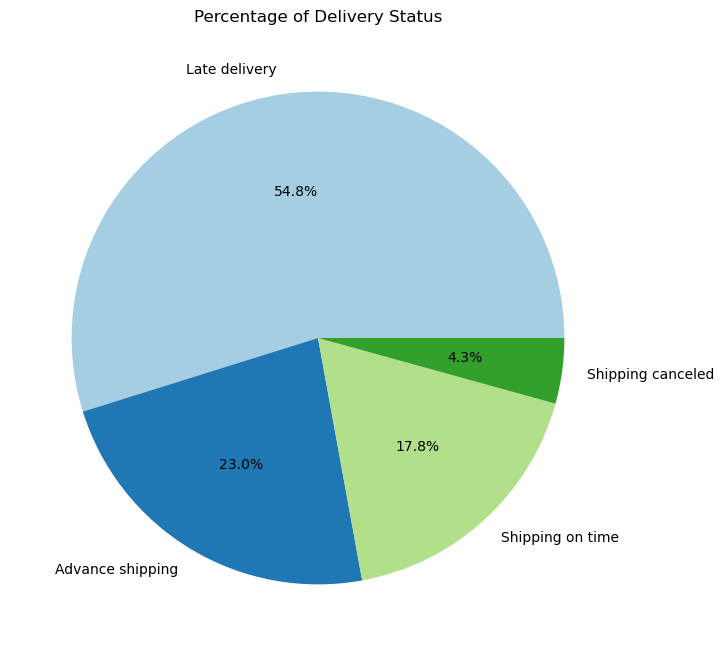

In [6]:
# Tính toán phần trăm
delivery_status_percent = delivery_status_counts / delivery_status_counts.sum() * 100

# Vẽ biểu đồ tròn
plt.figure(figsize=(8, 8))
plt.pie(delivery_status_percent, labels=delivery_status_percent.index, autopct='%1.1f%%', colors=plt.cm.Paired.colors)
plt.title('Percentage of Delivery Status')
plt.show()

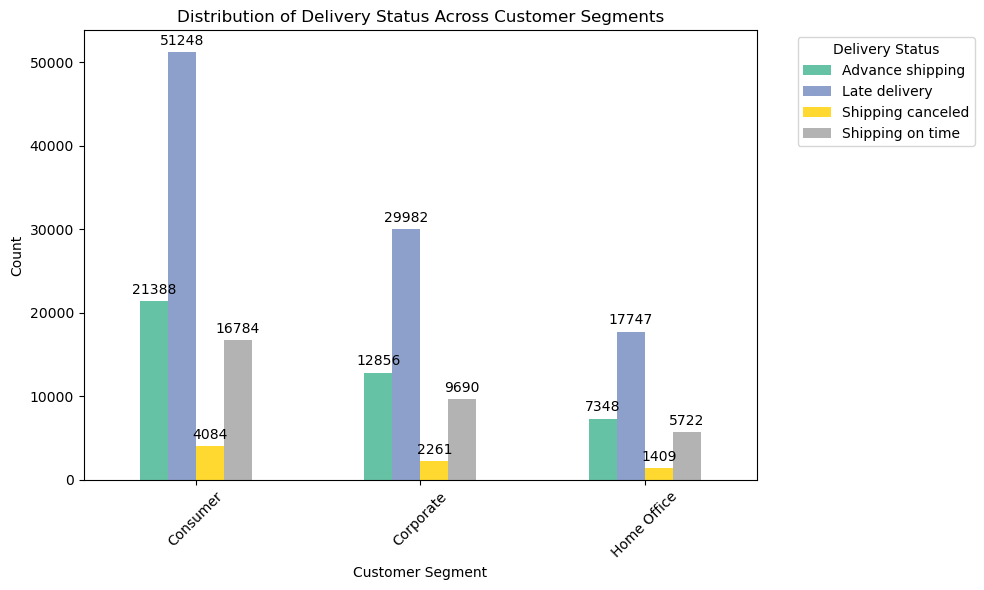

In [7]:
# Giả sử df là DataFrame chứa dữ liệu của bạn
# Tạo bảng tần số cho hai biến Delivery Status và Customer Segment
cross_tab = pd.crosstab(df['Customer Segment'], df['Delivery Status'])

# Vẽ biểu đồ cột nhóm với màu sắc tùy chỉnh
plt.figure(figsize=(10, 6))
ax = cross_tab.plot(kind='bar', colormap='Set2', ax=plt.gca())  # Sử dụng bảng màu 'Set2'

plt.title('Distribution of Delivery Status Across Customer Segments')
plt.xlabel('Customer Segment')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Delivery Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  # Đảm bảo rằng các nhãn không bị cắt

# Thêm số liệu vào các cột
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', padding=3, fontsize=10)

plt.show()

In [8]:
df = df.drop(columns=['Customer Email', 'Customer Password', 'Customer Fname', 'Customer Lname', 'Customer Id', 'Order Customer Id'])

In [9]:
# Lọc 
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# In danh sách các biến số
print("Danh sách các biến số:")
print(numerical_columns)
# Lọc 
categorical_columns = df.select_dtypes(include=['object']).columns

# In danh sách các cột phân loại
print("Danh sách các biến phân loại:")
print(categorical_columns)

Danh sách các biến số:
Index(['Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Late_delivery_risk',
       'Category Id', 'Customer Zipcode', 'Department Id', 'Latitude',
       'Longitude', 'Order Id', 'Order Item Cardprod Id',
       'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Order Zipcode', 'Product Card Id',
       'Product Category Id', 'Product Description', 'Product Price',
       'Product Status'],
      dtype='object')
Danh sách các biến phân loại:
Index(['Type', 'Delivery Status', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Segment', 'Customer State',
       'Customer Street', 'Department Name', 'Market', 'Order City',
       'Order Country', 'order date (DateOrders)', 'Order Region',
       'Order State', 'Ord

In [10]:
# Select only categorical columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

# Calculate the number of unique values for each categorical variable
unique_counts = df[categorical_columns].nunique()

# Display the results
print(unique_counts)

Type                              4
Delivery Status                   4
Category Name                    50
Customer City                   563
Customer Country                  2
Customer Segment                  3
Customer State                   46
Customer Street                7458
Department Name                  11
Market                            5
Order City                     3597
Order Country                   164
order date (DateOrders)       65752
Order Region                     23
Order State                    1089
Order Status                      9
Product Image                   118
Product Name                    118
shipping date (DateOrders)    63701
Shipping Mode                     4
dtype: int64


In [11]:
filtered_columns = unique_counts[unique_counts < 10]
print(filtered_columns)


Type                4
Delivery Status     4
Customer Country    2
Customer Segment    3
Market              5
Order Status        9
Shipping Mode       4
dtype: int64


In [12]:
# Lọc các cột là biến phân loại
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
# Thống kê số lượng giá trị duy nhất của từng biến phân loại
unique_values_count = df[categorical_columns].nunique()
# In kết quả
print("Số lượng giá trị duy nhất của từng biến phân loại:")
print(unique_values_count)
# Lọc các biến phân loại có số lượng giá trị duy nhất nhỏ hơn 10
small_unique_value_counts = unique_values_count[unique_values_count <= 10]
print(small_unique_value_counts)

Số lượng giá trị duy nhất của từng biến phân loại:
Type                              4
Delivery Status                   4
Category Name                    50
Customer City                   563
Customer Country                  2
Customer Segment                  3
Customer State                   46
Customer Street                7458
Department Name                  11
Market                            5
Order City                     3597
Order Country                   164
order date (DateOrders)       65752
Order Region                     23
Order State                    1089
Order Status                      9
Product Image                   118
Product Name                    118
shipping date (DateOrders)    63701
Shipping Mode                     4
dtype: int64
Type                4
Delivery Status     4
Customer Country    2
Customer Segment    3
Market              5
Order Status        9
Shipping Mode       4
dtype: int64


In [13]:
# Chọn các cột số
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Định nghĩa hàm để phát hiện và loại bỏ giá trị ngoại lệ bằng phương pháp IQR
def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Lọc bỏ các giá trị ngoại lệ
    df_no_outliers = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df_no_outliers

# Tạo một bản sao của dataframe gốc để loại bỏ các giá trị ngoại lệ
df_cleaned = df.copy()

# Kiểm tra và loại bỏ các giá trị ngoại lệ cho mỗi cột số
for col in numerical_columns:
    initial_count = df_cleaned.shape[0]
    
    # Loại bỏ các giá trị ngoại lệ
    df_cleaned = remove_outliers(df_cleaned, col)
    
    final_count = df_cleaned.shape[0]
    removed = initial_count - final_count
    
    print(f"Cột '{col}': Đã loại bỏ {removed} giá trị ngoại lệ")

# Hiển thị dữ liệu đã được làm sạch
print("\nDữ liệu sau khi đã loại bỏ các giá trị ngoại lệ:")
print(df_cleaned.head())

Cột 'Days for shipping (real)': Đã loại bỏ 0 giá trị ngoại lệ
Cột 'Days for shipment (scheduled)': Đã loại bỏ 0 giá trị ngoại lệ
Cột 'Benefit per order': Đã loại bỏ 18942 giá trị ngoại lệ
Cột 'Sales per customer': Đã loại bỏ 1207 giá trị ngoại lệ
Cột 'Late_delivery_risk': Đã loại bỏ 0 giá trị ngoại lệ
Cột 'Category Id': Đã loại bỏ 0 giá trị ngoại lệ
Cột 'Customer Zipcode': Đã loại bỏ 3 giá trị ngoại lệ
Cột 'Department Id': Đã loại bỏ 321 giá trị ngoại lệ
Cột 'Latitude': Đã loại bỏ 7 giá trị ngoại lệ
Cột 'Longitude': Đã loại bỏ 1244 giá trị ngoại lệ
Cột 'Order Id': Đã loại bỏ 0 giá trị ngoại lệ
Cột 'Order Item Cardprod Id': Đã loại bỏ 0 giá trị ngoại lệ
Cột 'Order Item Discount': Đã loại bỏ 7009 giá trị ngoại lệ
Cột 'Order Item Discount Rate': Đã loại bỏ 0 giá trị ngoại lệ
Cột 'Order Item Id': Đã loại bỏ 0 giá trị ngoại lệ
Cột 'Order Item Product Price': Đã loại bỏ 21845 giá trị ngoại lệ
Cột 'Order Item Profit Ratio': Đã loại bỏ 4518 giá trị ngoại lệ
Cột 'Order Item Quantity': Đã loại b

In [14]:
# 1. Kiểm tra giá trị thiếu
missing_threshold = 0.5  # Ngưỡng 50%
missing_data = df.isnull().mean()
columns_to_drop = missing_data[missing_data > missing_threshold].index.tolist()

# 2. Kiểm tra tính đa dạng
for column in df.columns:
    if df[column].nunique() <= 1:  # Nếu chỉ có một giá trị duy nhất
        columns_to_drop.append(column)

# 3. Loại bỏ cột không phải số trước khi tính toán tương quan
df_numeric = df.select_dtypes(include=['number'])  # Chỉ giữ các cột số
correlation_matrix = df_numeric.corr()

# 4. Xóa các cột đã xác định
df_cleaned = df.drop(columns=columns_to_drop)

# In danh sách các cột đã xóa
print("Các cột đã xóa:", columns_to_drop)

# In ma trận tương quan
print("Ma trận tương quan:\n", correlation_matrix)

Các cột đã xóa: ['Order Zipcode', 'Product Description', 'Product Description', 'Product Status']
Ma trận tương quan:
                                Days for shipping (real)  \
Days for shipping (real)                       1.000000   
Days for shipment (scheduled)                  0.515880   
Benefit per order                             -0.005101   
Sales per customer                             0.001757   
Late_delivery_risk                             0.401415   
Category Id                                   -0.000348   
Customer Zipcode                               0.000112   
Department Id                                 -0.001631   
Latitude                                      -0.004073   
Longitude                                      0.003911   
Order Id                                      -0.001711   
Order Item Cardprod Id                        -0.000859   
Order Item Discount                            0.002231   
Order Item Discount Rate                       0.001467

In [16]:
df.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Segment', 'Customer State',
       'Customer Street', 'Customer Zipcode', 'Department Id',
       'Department Name', 'Latitude', 'Longitude', 'Market', 'Order City',
       'Order Country', 'order date (DateOrders)', 'Order Id',
       'Order Item Cardprod Id', 'Order Item Discount',
       'Order Item Discount Rate', 'Order Item Id', 'Order Item Product Price',
       'Order Item Profit Ratio', 'Order Item Quantity', 'Sales',
       'Order Item Total', 'Order Profit Per Order', 'Order Region',
       'Order State', 'Order Status', 'Order Zipcode', 'Product Card Id',
       'Product Category Id', 'Product Description', 'Product Image',
       'Product Name', 'Product Price', 'Product Status',
       'shipping date (DateOrders)', '

In [17]:
# Tạo danh sách cho các cột rời rạc và liên tục
discrete_columns = []
continuous_columns = []

# Kiểm tra từng cột trong DataFrame
for column in df.columns:
    # Kiểm tra kiểu dữ liệu
    if pd.api.types.is_numeric_dtype(df[column]):
        # Nếu số lượng giá trị duy nhất nhỏ hơn một ngưỡng nhất định, coi là rời rạc
        if df[column].nunique() < 10:  # Thay đổi ngưỡng nếu cần
            discrete_columns.append(column)
        else:
            continuous_columns.append(column)
    else:
        # Nếu không phải kiểu số, coi là cột rời rạc
        discrete_columns.append(column)

# In kết quả
print("Cột rời rạc:", discrete_columns)
print("Cột liên tục:", continuous_columns)

Cột rời rạc: ['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)', 'Delivery Status', 'Late_delivery_risk', 'Category Name', 'Customer City', 'Customer Country', 'Customer Segment', 'Customer State', 'Customer Street', 'Department Name', 'Market', 'Order City', 'Order Country', 'order date (DateOrders)', 'Order Item Quantity', 'Order Region', 'Order State', 'Order Status', 'Product Description', 'Product Image', 'Product Name', 'Product Status', 'shipping date (DateOrders)', 'Shipping Mode']
Cột liên tục: ['Benefit per order', 'Sales per customer', 'Category Id', 'Customer Zipcode', 'Department Id', 'Latitude', 'Longitude', 'Order Id', 'Order Item Cardprod Id', 'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id', 'Order Item Product Price', 'Order Item Profit Ratio', 'Sales', 'Order Item Total', 'Order Profit Per Order', 'Order Zipcode', 'Product Card Id', 'Product Category Id', 'Product Price']


In [18]:
# Tính toán bảng thống kê mô tả của các cột có giá trị liên tục
continuous_columns = df[continuous_columns].describe()

# Hiển thị thống kê
continuous_columns

,Benefit per order,Sales per customer,Category Id,Customer Zipcode,Department Id,Latitude,Longitude,Order Id,Order Item Cardprod Id,Order Item Discount,...,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Sales,Order Item Total,Order Profit Per Order,Order Zipcode,Product Card Id,Product Category Id,Product Price
count,180519.000000,180519.000000,180519.000000,180516.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,...,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,24840.000000,180519.000000,180519.000000,180519.000000
mean,21.974989,183.107609,31.851451,35921.126914,5.443460,29.719955,-84.915675,36221.894903,692.509764,20.664741,...,90260.000000,141.232550,0.120647,203.772096,183.107609,21.974989,55426.132327,692.509764,31.851451,141.232550
std,104.433526,120.043670,15.640064,37542.461122,1.629246,9.813646,21.433241,21045.379569,336.446807,21.800901,...,52111.490959,139.732492,0.466796,132.273077,120.043670,104.433526,31919.279101,336.446807,15.640064,139.732492
min,-4274.979980,7.490000,2.000000,603.000000,2.000000,-33.937553,-158.025986,1.000000,19.000000,0.000000,...,1.000000,9.990000,-2.750000,9.990000,7.490000,-4274.979980,1040.000000,19.000000,2.000000,9.990000
25%,7.000000,104.379997,18.000000,725.000000,4.000000,18.265432,-98.446312,18057.000000,403.000000,5.400000,...,45130.500000,50.000000,0.080000,119.980003,104.379997,7.000000,23464.000000,403.000000,18.000000,50.000000
50%,31.520000,163.990005,29.000000,19380.000000,5.000000,33.144863,-76.847908,36140.000000,627.000000,14.000000,...,90260.000000,59.990002,0.270000,199.919998,163.990005,31.520000,59405.000000,627.000000,29.000000,59.990002
75%,64.800003,247.399994,45.000000,78207.000000,7.000000,39.279617,-66.370583,54144.000000,1004.000000,29.990000,...,135389.500000,199.990005,0.360000,299.950012,247.399994,64.800003,90008.000000,1004.000000,45.000000,199.990005
max,911.799988,1939.989990,76.000000,99205.000000,12.000000,48.781933,115.263077,77204.000000,1363.000000,500.000000,...,180519.000000,1999.989990,0.500000,1999.989990,1939.989990,911.799988,99301.000000,1363.000000,76.000000,1999.989990


In [19]:
# Chuyển các cột dữ liệu rời rạc về kiểu dữ liệu 'object' và tính toán bảng thống kê mô tả
discrete_columns = df[discrete_columns].astype('object').describe()

# Hiển thị thống kê
discrete_columns


,Type,Days for shipping (real),Days for shipment (scheduled),Delivery Status,Late_delivery_risk,Category Name,Customer City,Customer Country,Customer Segment,Customer State,...,Order Item Quantity,Order Region,Order State,Order Status,Product Description,Product Image,Product Name,Product Status,shipping date (DateOrders),Shipping Mode
count,180519,180519,180519,180519,180519,180519,180519,180519,180519,180519,...,180519,180519,180519,180519,0,180519,180519,180519,180519,180519
unique,4,7,4,4,2,50,563,2,3,46,...,5,23,1089,9,0,118,118,1,63701,4
top,DEBIT,2,4,Late delivery,1,Cleats,Caguas,EE. UU.,Consumer,PR,...,1,Central America,Inglaterra,COMPLETE,NaN,http://images.acmesports.sports/Perfect+Fitnes...,Perfect Fitness Perfect Rip Deck,0,1/5/2016 5:58,Standard Class
freq,69295,56618,107752,98977,98977,24551,66770,111146,93504,69373,...,99134,28341,6722,59491,NaN,24515,24515,180519,10,107752


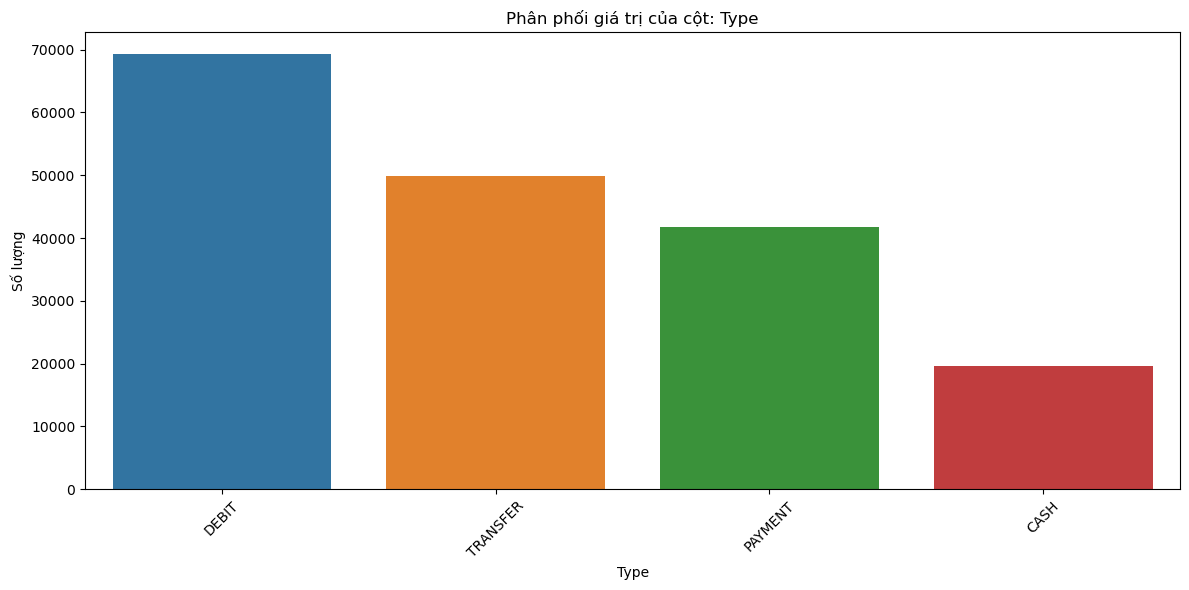

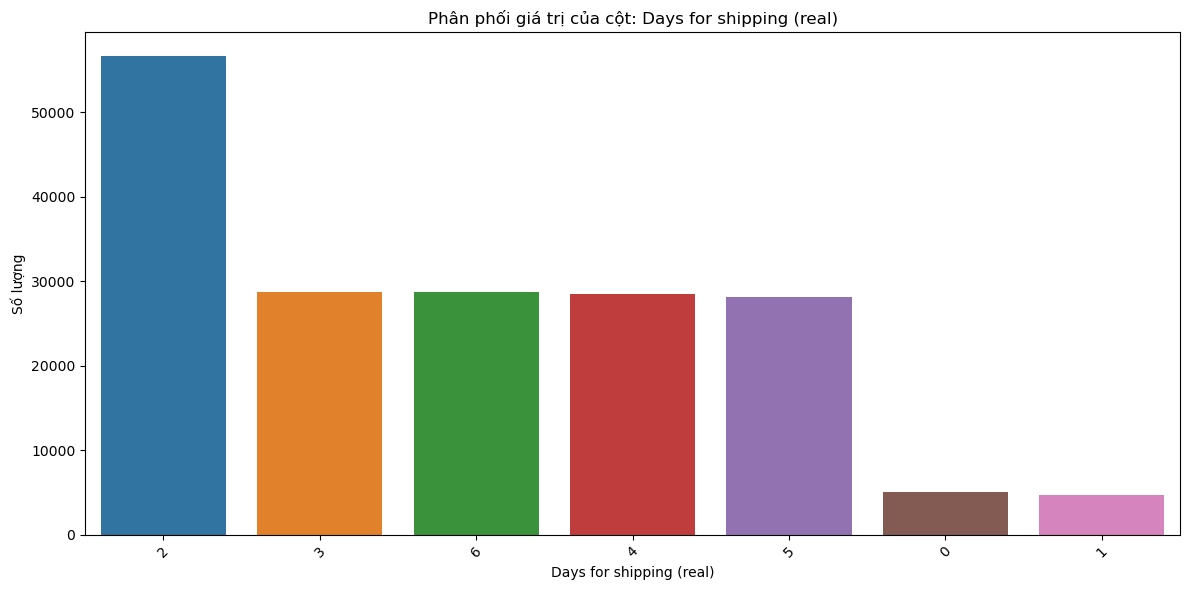

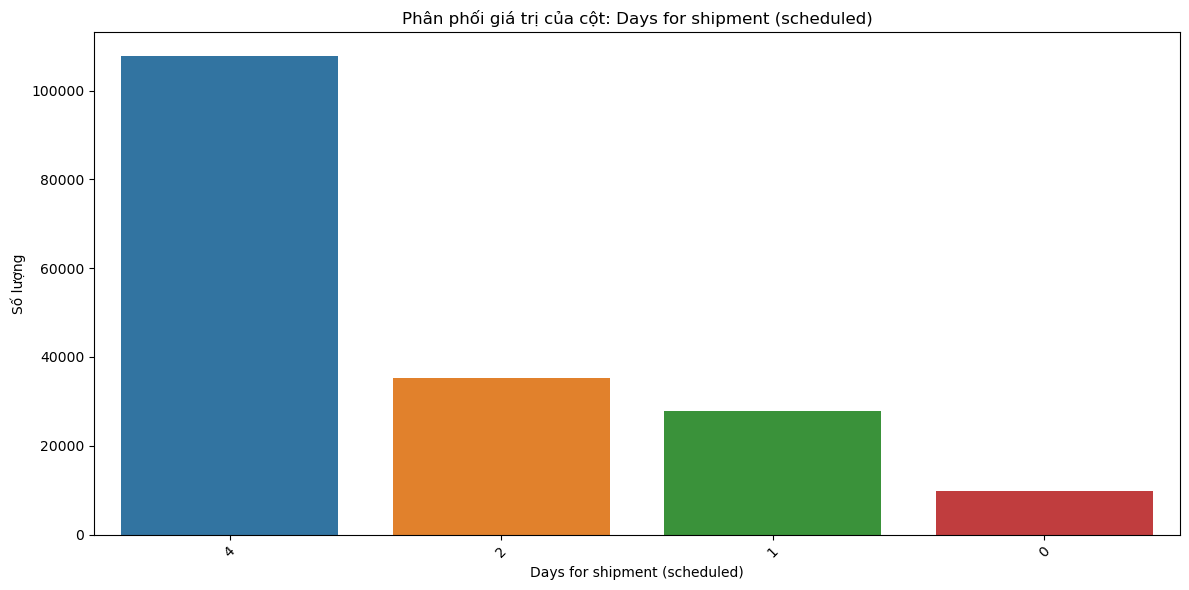

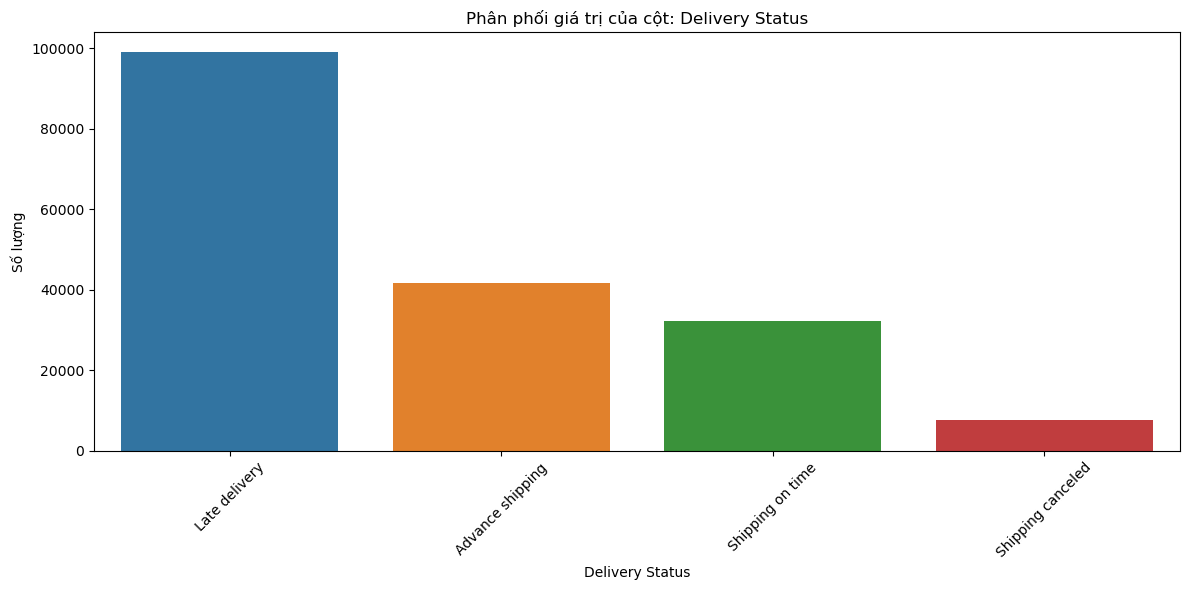

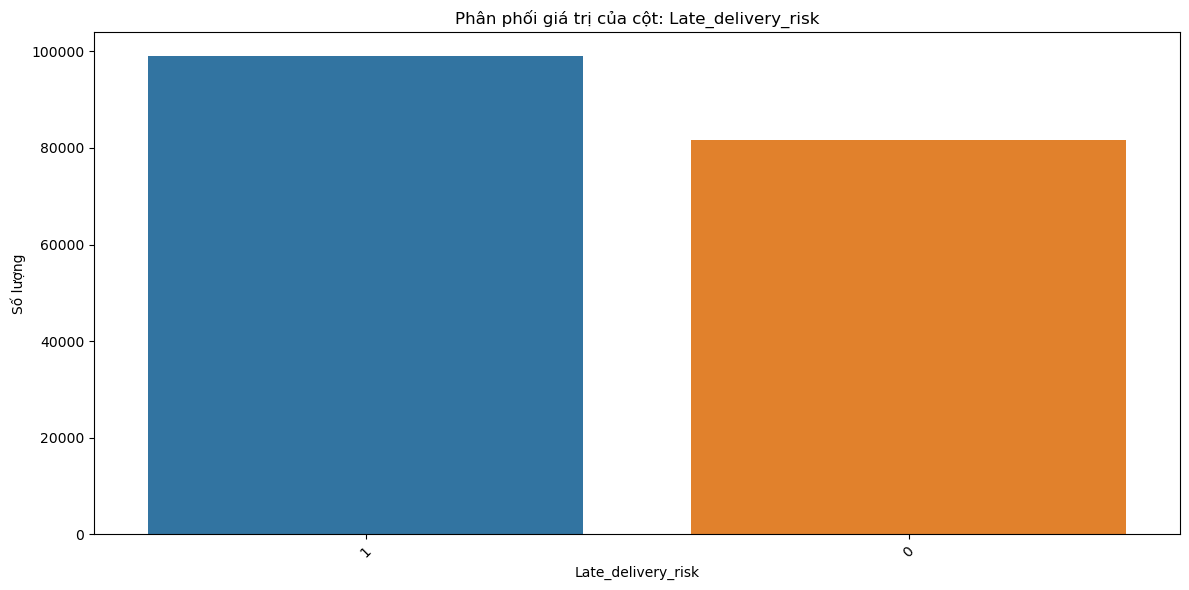

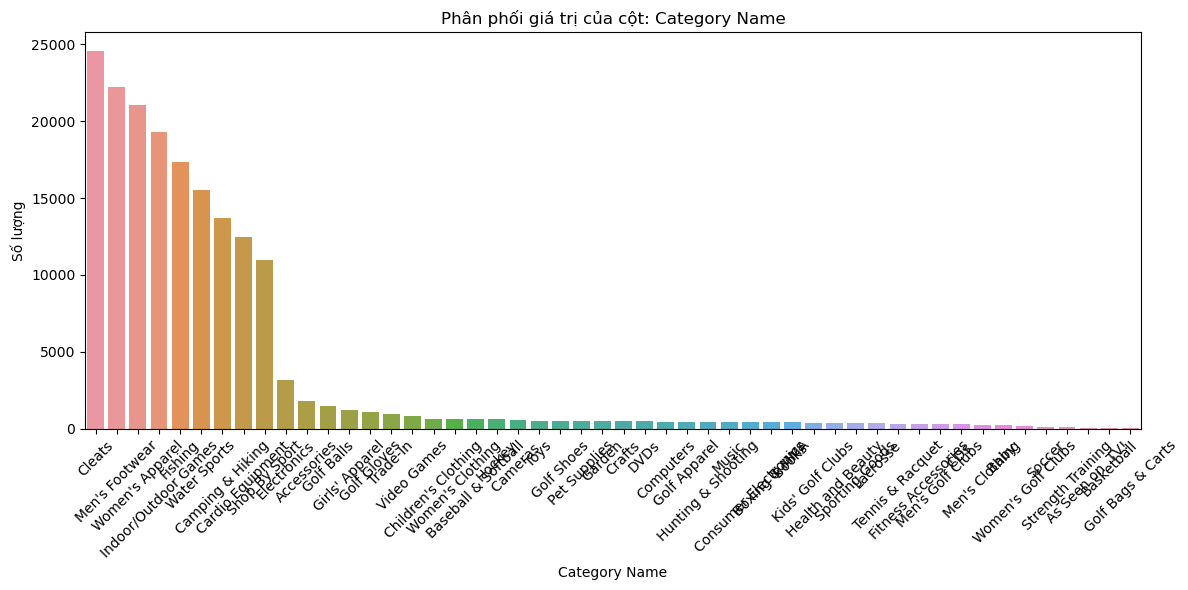

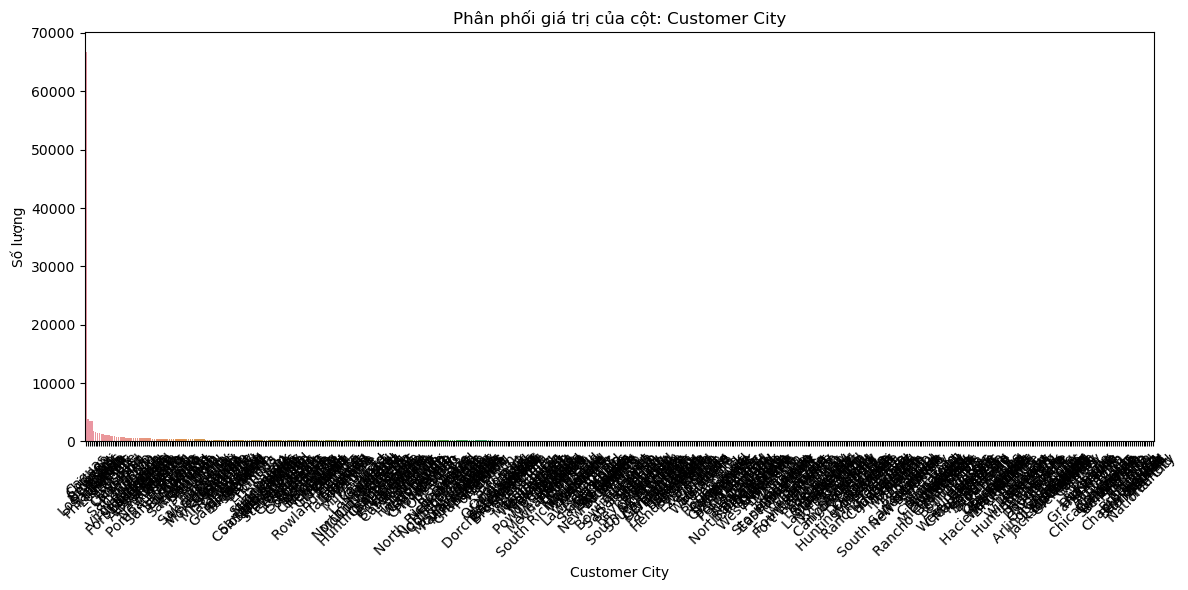

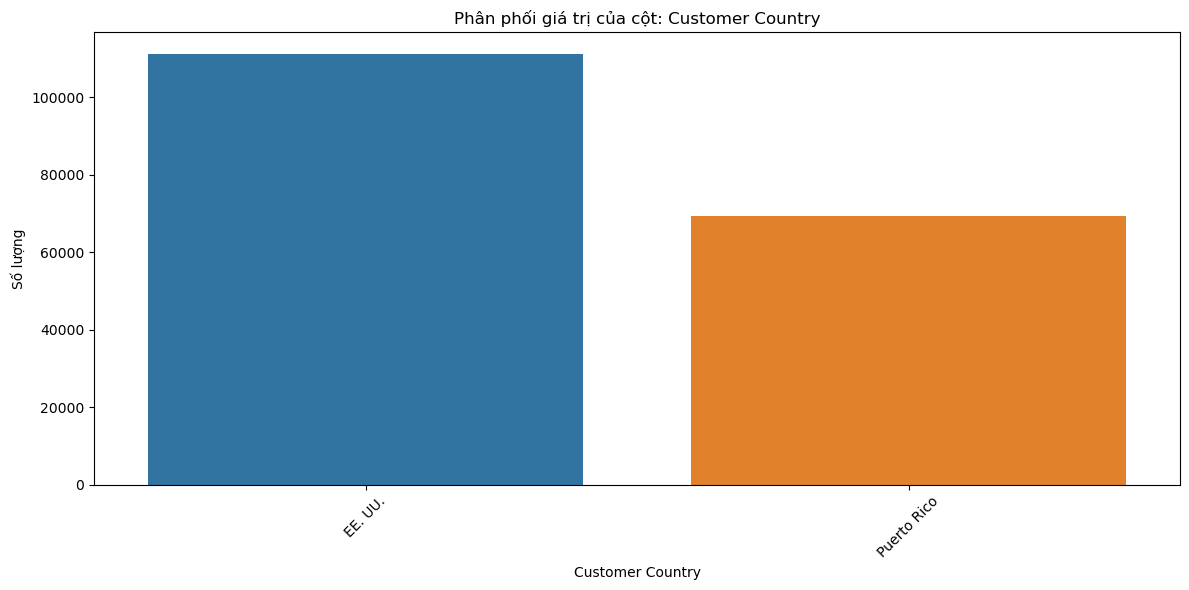

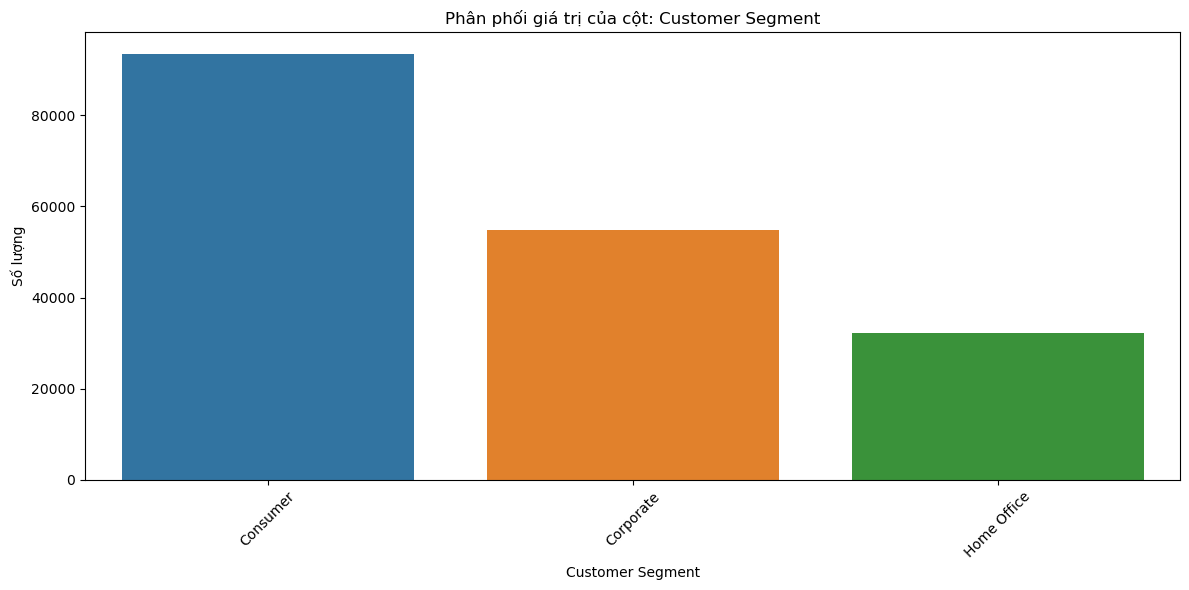

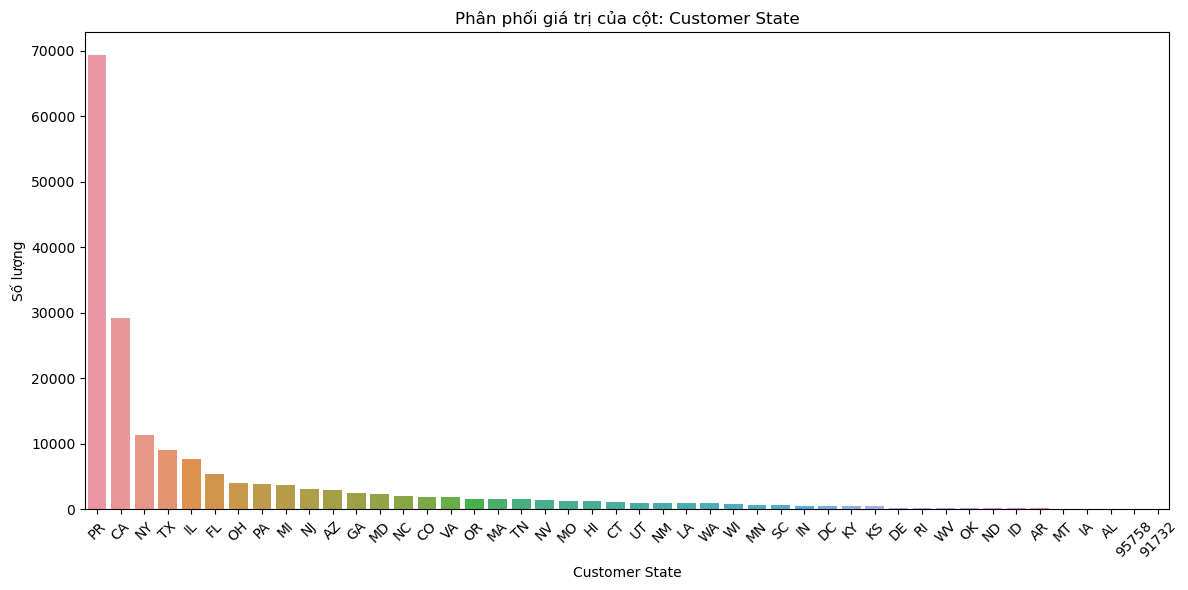

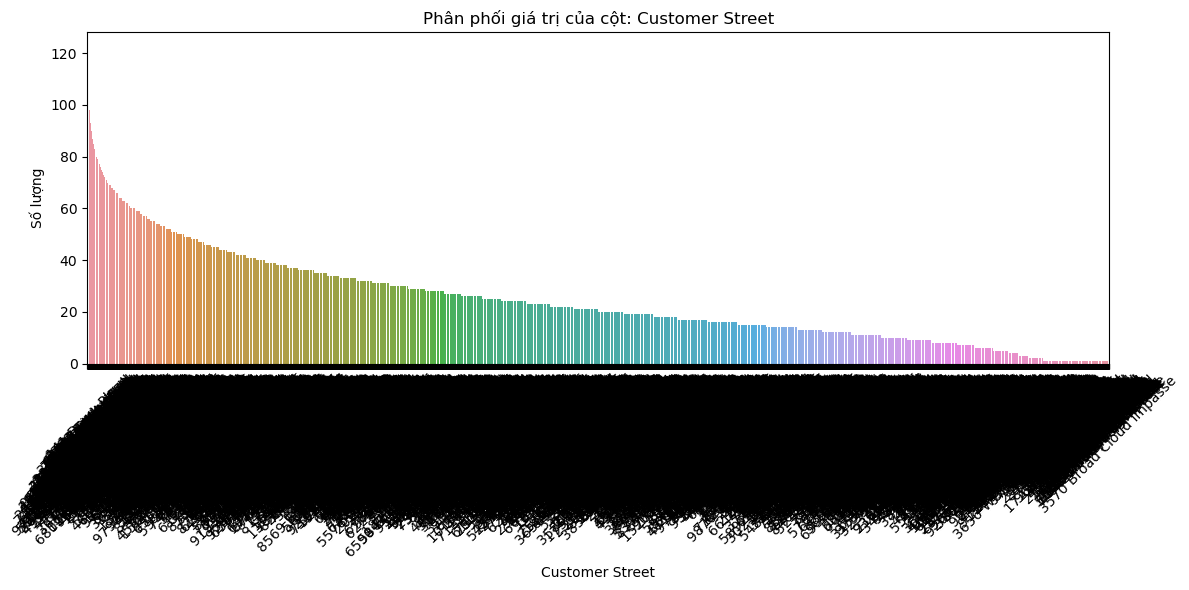

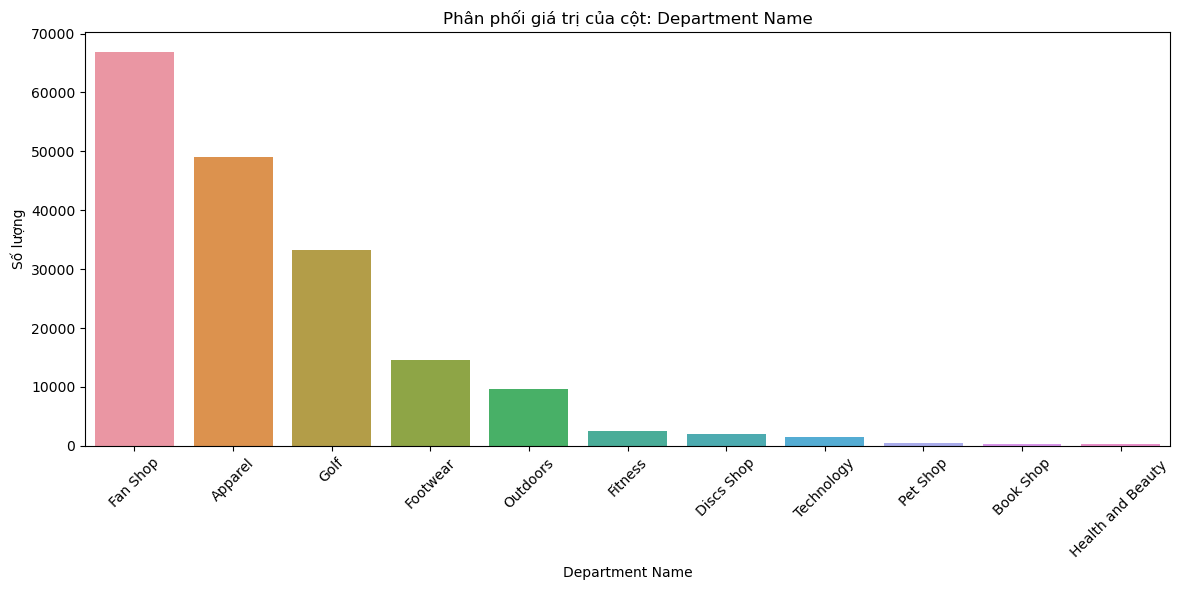

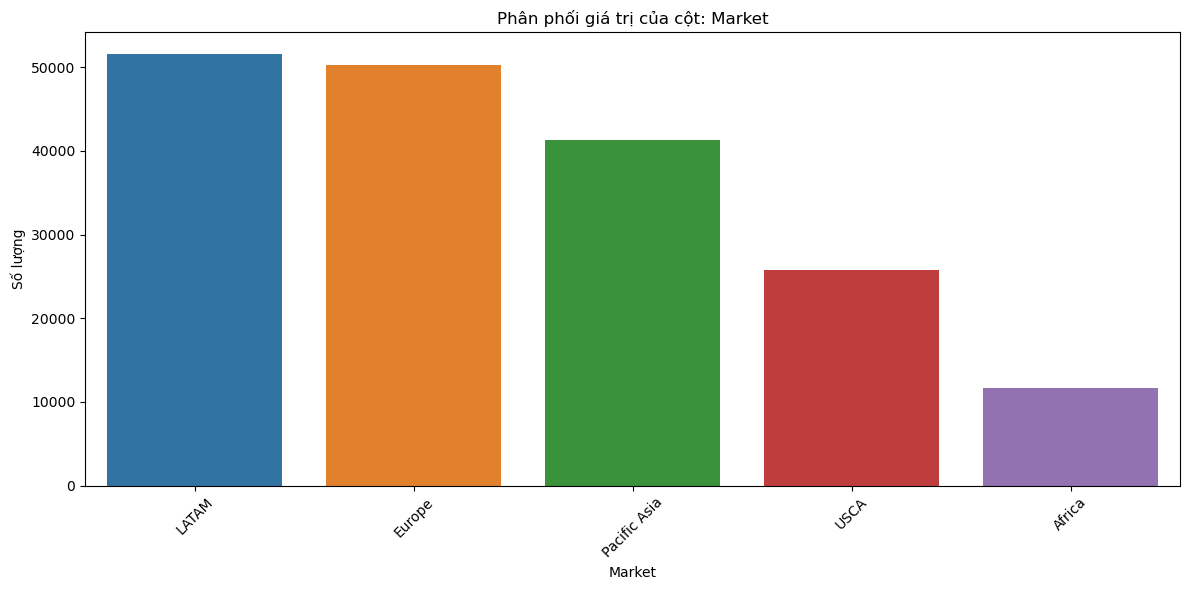

C:\Users\84869\AppData\Local\Temp\ipykernel_18560\2752221485.py:17: UserWarning: Glyph 146 (\x92) missing from current font.
  plt.tight_layout()
C:\Users\84869\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


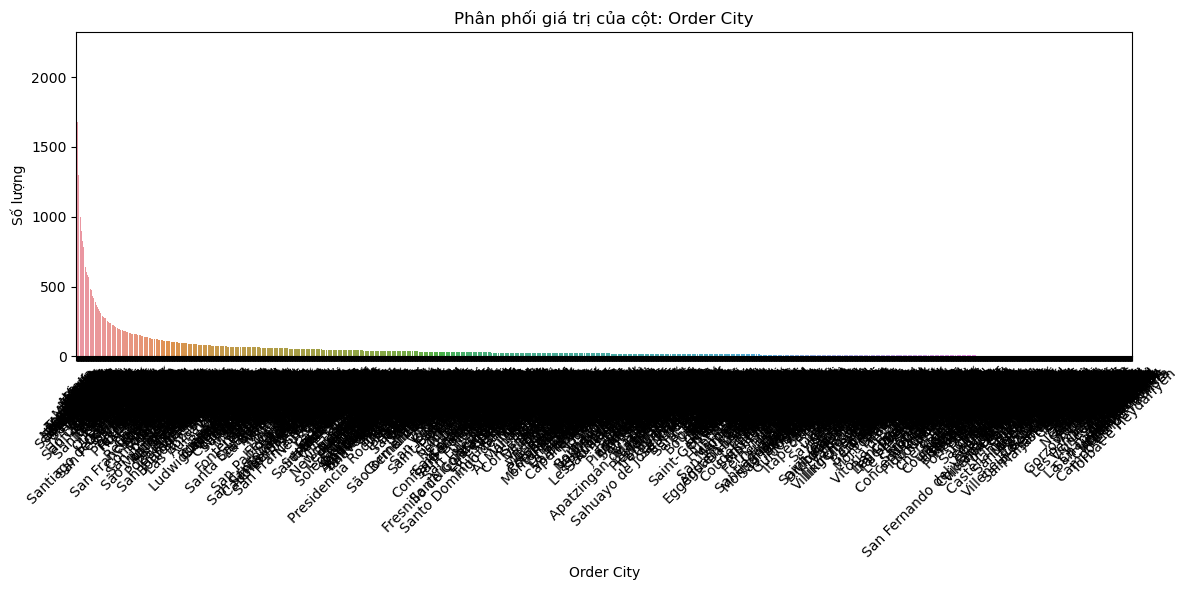

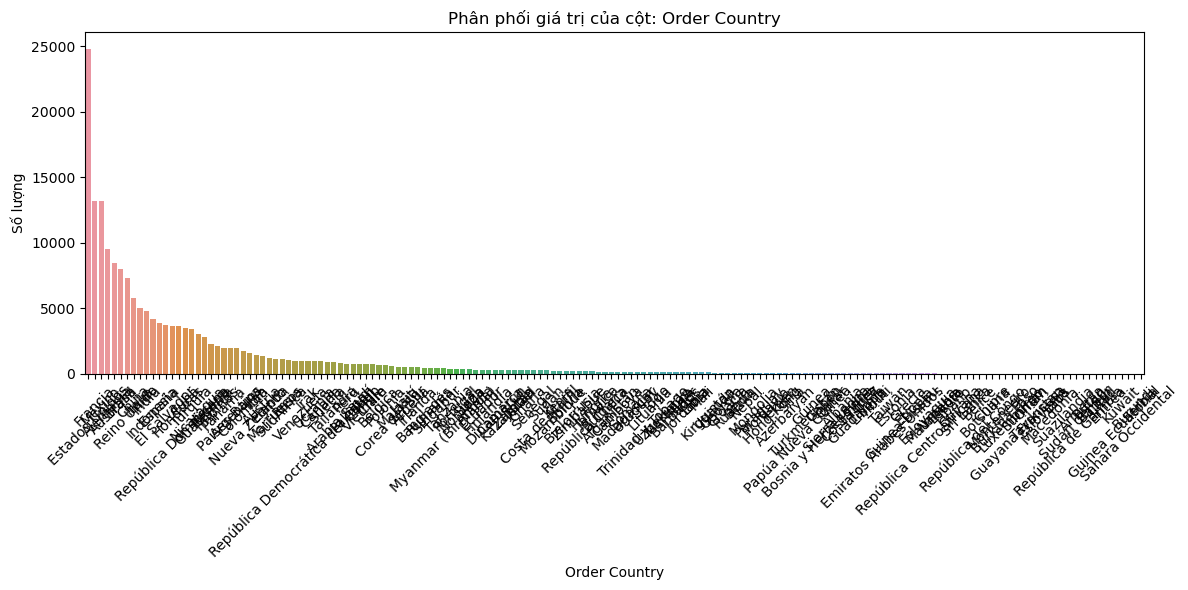

In [ ]:
# Tạo một đồ thị cho mỗi cột rời rạc
for column in discrete_columns:
    plt.figure(figsize=(12, 6))
    
    # Tạo biểu đồ cột cho cột rời rạc
    sns.countplot(data=df, x=column, order=df[column].value_counts().index)
    
    # Thiết lập tiêu đề và nhãn
    plt.title(f'Phân phối giá trị của cột: {column}')
    plt.xlabel(column)
    plt.ylabel('Số lượng')
    
    # Xoay nhãn trên trục x nếu cần
    plt.xticks(rotation=45)
    
    # Hiển thị biểu đồ
    plt.tight_layout()
    plt.show()